# CS597 PA2 Implement Gradient Descent Using PyTorch (100 pts)

### Adam Torek

In [1]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


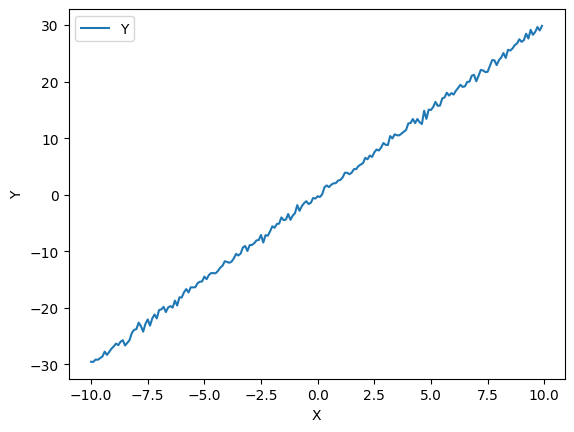

In [2]:
# Create datasets for linear regression
X = torch.arange(-10, 10, 0.1).view(-1, 1)  # 200 data points
Y = 3 * X + 0.5 * torch.randn(X.size())

# Plot the data points
plt.plot(X.numpy(), Y.numpy(), label='Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
# Define the model for linear regression (10 pts)
def model(data, weight, bias):
    # Multiply the weight scalar by the data vector and add the bias value
    return  weight * data + bias


In [ ]:
# Define the loss function using Mean Square Error (MSE) (10 pts)
def loss_func(y_pred, y_true):
    # Calculate the MSE Loss between the model's predictions
    # and the ground truth
    return F.mse_loss(y_pred, y_true)


In [ ]:
# Training with Gradient Descent (GD) (30 pts)
# hints: You need to initialize the parameters first, and then finish the training process (forward propagation, compute the loss, backward propagation, update the parameters, reset the gradients, and print out the values).

def fit_GD(model, loss_func, X, Y, lr, num_epochs):
    loss_log = []
     # Create weight and bias for linear model
    weight = torch.rand(size=(1,), requires_grad=True)
    bias = torch.rand(size=(1,), requires_grad=True)
    # Iterate over N epochs of the linear model
    for epoch in range(num_epochs):
        # Get predictions from the model using the weight and bias values
        predictions = model(X, weight, bias)
        
        # Calculate the loss between the predictions and ground truth values using MSE
        loss_results = loss_func(predictions, Y)
        # Propagate the error backward
        loss_results.backward()

        # Push the weight and bias along the gradient 
        weight.data = weight.data - lr * weight.grad.data
        bias.data = bias.data - lr * bias.grad.data

        # Zero out the weight and bias gradients to prevent accumulation
        weight.grad.data.zero_()
        bias.grad.data.zero_()

        # Print out the epoch, epoch loss, and current wight and bias values
        print("Epoch " + str(epoch+1) + " - loss: " + str(loss_results.item()) + ", weight: " + str(weight.item()) + ", bias: " + str(bias.item()))

        # Append this epoch's loss to the loss log
        loss_log.append(loss_results.item())
    # Return the loss across N epochs as a numpy array
    return np.array(loss_log)

# Run full-dataset gradient descent on the linear X and Y values for N=20 epochs
num_epochs = 20
lr = 0.01  # learning rate
loss_GD = fit_GD(model, loss_func, X, Y, lr, num_epochs)
    

Epoch 1 - loss: 155.5001983642578, weight: 2.2893764972686768, bias: 0.03488098457455635
Epoch 2 - loss: 17.46572494506836, weight: 2.768972635269165, bias: 0.03279570862650871
Epoch 3 - loss: 2.1316072940826416, weight: 2.9288201332092285, bias: 0.031231742352247238
Epoch 4 - loss: 0.42801880836486816, weight: 2.982095718383789, bias: 0.0298589039593935
Epoch 5 - loss: 0.23862525820732117, weight: 2.9998509883880615, bias: 0.028566787019371986
Epoch 6 - loss: 0.217445969581604, weight: 3.005767583847046, bias: 0.027318278327584267
Epoch 7 - loss: 0.21495874226093292, weight: 3.0077383518218994, bias: 0.0261006448417902
Epoch 8 - loss: 0.21455328166484833, weight: 3.0083940029144287, bias: 0.02490934170782566
Epoch 9 - loss: 0.2143842577934265, weight: 3.0086114406585693, bias: 0.023742513731122017
Epoch 10 - loss: 0.21424633264541626, weight: 3.0086827278137207, bias: 0.022599242627620697
Epoch 11 - loss: 0.21411658823490143, weight: 3.0087053775787354, bias: 0.02147890254855156
Epoch

Text(0.5, 1.0, 'Loss vs Epochs For Linear Model During Full Gradient Descent')

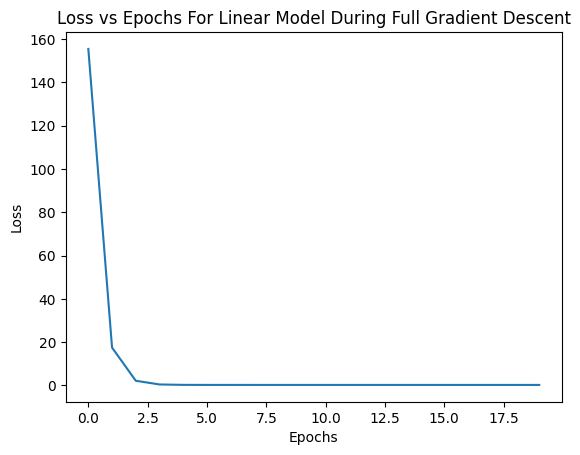

In [26]:
# Plot the loss curve (5 pts)
plt.plot(loss_GD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs For Linear Model During Full Gradient Descent")

In [ ]:
# Training with Batch Gradient Descent (BGD) (30 pts)
# hints: Besides implementing GD, you need to compute the gradient batch by batch in each epoch.
# steps: 1. calculate the number of batch based on batch_size; 2. traverse each batch in each epoch.

def fit_BGD(model, loss_func, X, Y, lr, num_epochs, batch_size):
    loss_log = []
    # Create weight and bias for linear model
    weight = torch.rand(size=(1,), requires_grad=True)
    bias = torch.rand(size=(1,), requires_grad=True)
    # Split X and y into batches based on batch size
    X_batched = torch.split(X, batch_size)
    y_batched = torch.split(Y, batch_size)
    # Train the linear model for N epochs using batched gradient descent
    for epoch in range(num_epochs):
        loss_batches = []
        # Iterate over M batches in X and Y based on batch size
        for x_batch, y_batch in zip(X_batched, y_batched):
            # Collect predicted values from linear model
            predictions = model(x_batch, weight, bias)
            
            # Get the loss using MSE
            loss_results = loss_func(predictions, y_batch)
            # Propagate the error backward through the linear model
            loss_results.backward()

            # Use gradient descent to update the weight and bias parameters
            weight.data = weight.data - lr * weight.grad.data
            bias.data = bias.data - lr * bias.grad.data

            # Zero the gradients to prevent gradient accumulation
            weight.grad.data.zero_()
            bias.grad.data.zero_()

            # Append the batch loss to the total loss for this epoch
            loss_batches.append(loss_results.item())
        
        # Get the average loss across this entire epoch
        avg_loss = sum(loss_batches) / batch_size
        
        # Print the current epoch and loss values
        print("Epoch " + str(epoch+1) + " - loss: " + str(avg_loss))

        # Append this epoch's losses to the logs
        loss_log.append(avg_loss)

    # Return a numpy array of all the losses across M epochs
    return np.array(loss_log)

# Run batch gradient descent on the linear model with randomly initialized data
num_epochs = 20
batch_size = 10
lr = 0.01
loss_BGD = fit_BGD(model, loss_func, X, Y, lr, num_epochs, batch_size)
    

Epoch 1 - loss: 131.1643065802753
Epoch 2 - loss: 0.4921747505664825
Epoch 3 - loss: 0.48543413579463957
Epoch 4 - loss: 0.4806877955794334
Epoch 5 - loss: 0.47730268016457555
Epoch 6 - loss: 0.4748572982847691
Epoch 7 - loss: 0.47306738421320915
Epoch 8 - loss: 0.47174333557486536
Epoch 9 - loss: 0.4707523204386234
Epoch 10 - loss: 0.4700040079653263
Epoch 11 - loss: 0.469432906806469
Epoch 12 - loss: 0.4689955748617649
Epoch 13 - loss: 0.46865770816802976
Epoch 14 - loss: 0.46839497089385984
Epoch 15 - loss: 0.46819136291742325
Epoch 16 - loss: 0.46803118288517
Epoch 17 - loss: 0.46790564730763434
Epoch 18 - loss: 0.4678077094256878
Epoch 19 - loss: 0.467730438709259
Epoch 20 - loss: 0.46766873970627787


Text(0.5, 1.0, 'Loss vs Epochs For Linear Model Trained Using Batch Gradient Descent')

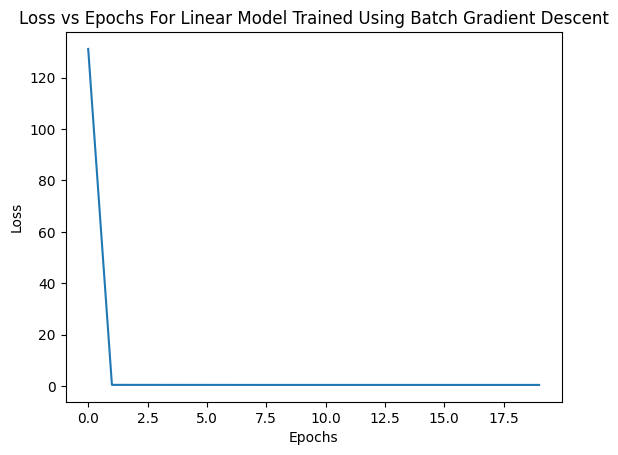

In [25]:
# Plot the loss curve (5 pts)
plt.plot(loss_BGD)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs For Linear Model Trained Using Batch Gradient Descent")

## Discuss when we should use BGD. (10 pts)

Batched gradient descent is used when the gradient descent for the full dataset is too large to fit into memory. Most deep learning models have many thousands, millions, or even billions of parameters, and each one requires at least another gradient parameter. This is also multiplied by the number of inputs that are sent into the model at once. At some point, the sheer number of parameters for full gradient descent is just too much for memory, even if the machine or sets of machines running the model have huge amounts of it. Batched gradient descent or BGD trains models almost as good as full gradient descent without the memory explosion problem. This large reduction in memory allows both the model and dataset to be much larger and train faster. This enables deep learning models that use BGD to scale faster and more efficient, thus making it useful when gradient descent across the whole dataset is difficult or impossible (which it often is.)